# Machine Learning Engineer Nanodegree
## Capstone Proposal
Elissa Backas
August 15, 2017

## Proposal


### Domain Background
"Breast is Best." (1) As a new mother, this has been drilled into my head by healthcare providers, books, family, friends, random people on the internet. Breastmilk is the most nutritional choice for the first months of an infant's life. However, despite this knowledge, many woman don't breastfeed for the recommended 12 months or longer. The CDC reports only 30.7% of women continue breastfeeding for at least a year. The CDC reports one of the biggest factors in the success of breastfeeding is breastfeeding friendly hospitals and programs that support breastfeeding. (2) A woman's attitude towards breastfeeding and the support system around her, greatly influences if she will initiate breastfeeding and how long she will breastfeed for. (3)

I personally breastfed my son well past the 12-month mark, even after struggling with supply issues and supplementation, due to the support I received from an online community. Had I known about such community earlier, my problems could have been identified sooner. There are so many people out there who want to offer support in the form of these online communities, La Leche League, and other programs. I think it's important that we deliver this support to the women who want it and need it as early as possible so they can breastfeed for as long as they like.

1. https://www.aap.org/en-us/about-the-aap/aap-press-room/pages/aap-reaffirms-breastfeeding-guidelines.aspx
2. https://www.cdc.gov/breastfeeding/data/reportcard.htm
3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1595282/

### Problem Statement

What demographic factors predict how long a woman will breastfeed for? Given a woman's age, race, poverty level, education level, etc, how long is she likely to breastfeed her child? If we know a woman is at risk for not breastfeeding for as long as she would like, she can be given additional support from existing breastfeeding programs.

### Datasets and Inputs

I'm using the National Center for Health Statistics (NCHS). (2016). 2013-2015 National Survey of Family Growth Public Use Data and Documentation. Hyattsville, MD: CDC National Center for Health Statistics. Retrieved fromhttp://www.cdc.gov/nchs/nsfg/nsfg_2013_2015_puf.htm

This survey contains a plethora of information relevant to family planning and pregnancy. I only plan on using the demographic data from the female pregnancy survey as well as the breastfeeding information including breastfeeding duration from that survey. I may also use some data from the main female respondent survey. 

I am only looking at demographic data as just demographic data alone may help as doctors have access to this information and may be able to intervene early without having to administer a special survey. Also neighborhoods that contain more of a specific demographic group can be targeted for special programs.

Data in the survey was collected by female interviewers, in person, taking down responses on laptops, averaging 74 minutes. Interviewees were compensated. Respondents were given the opportunity to revise answers if they seemed inconsistent, but there may still be errors in the data due to human error. Values that were imputed manually or by regression for consistency are marked as so.

### Solution Statement

Use supervised learning to create a regression model, based on demographic information, that can predict how long a woman will breastfeed. Use feature_importance to choose which factors best predict breastfeeding duration. Input would be information such as age, race, education level etc and output would be the number of weeks she is likely to breastfeed for.

### Benchmark Model

This Australian study found the following demographic factors strongly correlated with a longer duration for breastfeeding:
https://internationalbreastfeedingjournal.biomedcentral.com/articles/10.1186/1746-4358-1-18
being born in an Asian country and older maternal age.
Negatively correlated factors included: the mother smoking 20 or more cigarettes per day pre-pregnancy and maternal obesity.

The study: "Demographic Factors that Predict Breastfeeding in
the Early Postpartum Period in Utah Women": https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwiG5-mmmd3VAhUS3YMKHW7uBusQFggoMAA&url=http%3A%2F%2Fdigitalcommons.usu.edu%2Fcgi%2Fviewcontent.cgi%3Farticle%3D1029%26context%3Detd&usg=AFQjCNF9xJ1wXWjYCVnZ4WzTPe4yuhIPOg) found the following factors correlated with breastfeeding duration: age, marital status, WIC participation, maternal education level, and maternal employment. This study found older mothers were more likely to continue breastfeeding longer. Single women were less likely to breastfeed while divorced and separated women were more likely compared to married women. Enrollment in WIC correlated negatively with breastfeeding. More education was positively correlated with breastfeeding. 

### Evaluation Metrics

I expect age, weight (if I can pull it out of the other survey), smoking habits (if there's enough data), country of origin, marital status, working status, poverty level, education level to emerge as predictive features for this model based on the benchmark models. 

I will split the NSFG data into training and testing sets, reserving 10% of my data for testing. I will compare regression models using the R2 score and pick the one with the best score. R^2 score compares the mean sqaured error between the simplest model and our model. If the model isn't much better than just going by the average, the R^2 score will be close to 0, if the model is good, it will be close to 1.

R^2 = 1 - residual sum of squares / total sum of squares.
https://en.wikipedia.org/wiki/Coefficient_of_determination

### Project Design

First I had to make sure the data was in a usable format, so I already found code to help me import it into a python pandas data frame. I then exported it to csv format so I could easily view the data in excel. 

I studied the questions and possible answers to see which I thought were usable and which had no relevance to the problem. There are many columns with little data I will drop. There are also redundant columns, dates measured in both months and weeks for instance, and many columns towards the end of the data signifying if the data was edited that are also not needed. I list all of the columns I'm keeping below and notes for some of them.

I also need to drop the women who did not have a pregnancy end in a live birth or who are still breastfeeding. For multiples, I'm going to assume breastfeeding duration was equal and will take other features as needed for the first child only. I need to figure out if the breastfeeding duration differs at all and if I can drop the statistic for the other children.

After dropping unnecessary data, I am going to scale my continuous features such as age and one hot encode my discrete features. I will then try a few different regressors, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, and see which has the best R^2 score. Decision tree algorithms seem a good fit here because I'm just as interested in interpreting the model to see how important the features are as I am in the model itself. 

I'll then use grid search with cross validation to fine tune the algorithm with different parameters. Once I have my model, I will compare the feature importance to the benchmark.

* CASEID  "Case identification number" #id number to correlate with the other survey
* PREGORDR   "Pregnancy order (number)"
* PREGEND1    "BC-1 How Pregnancy Ended - 1st mention"
* WKSGEST     "Gestational length of completed pregnancy (in weeks)"
* BPA_BDSCHECK1     "Whether 1st liveborn baby from this pregnancy was BPA or BDS" #drop babies who died or were given away for adoption
* BABYSEX1     "BD-2 Sex of 1st Liveborn Baby from This Pregnancy"
* CMBABDOB     "CM for baby's or babies' date of birth (delivery date)"
* HPAGELB     "BD-6 Father's age at time of child(ren) s birth"
* PRIORSMK     "BE-3 Amount R smoked in 6 mos before R knew she was pregnant" #I'd like to use this, but not enough data
* NPOSTSMK     "BE-5 Amount R smoked during pregnancy after R knew she was preg" #I'd like to use this, but not enough data
* GETPRENA     "BE-6 Any prenatal care for this pregnancy" #I'd like to use this, but not enough data
* CMKIDIED,2,3   "CM for child's date of death - 1st from this pregnancy" #only multiples died, will remove those rows from the data
* OUTCOM_S     "Outcome of pregnancy (based on corrected/chron sorted data)"
* NBRNLV_S     "# of babies born alive from this preg (based on CCSD)" #drop women with NaN for this
* COHPBEG     "EG-18a Was R living w/father of preg at beginning of preg"
* COHPEND     "EG-18b Was R living w/father of preg when preg ended/baby was born"
* BIRTHORD     "Birth order"
* AGEPREG     "Age at pregnancy outcome"
* DATECON     "CM date of conception"
* AGECON     "Age at time of conception"
* FMAROUT5     "Formal marital status at pregnancy outcome"
* PMARPREG     "Whether pregnancy ended before R's 1st marriage (premaritally)"
* RMAROUT6     "Informal marital status at pregnancy outcome - 6 categories"
* FMARCON5     "Formal marital status at conception - 5 categories"
* RMARCON6     "Informal marital status at conception - 6 categories"
* PAYDELIV     "Payment for delivery"
* LBW1     "Low birthweight - 1st baby from this preg"
* **BFEEDWKS     "Duration of breastfeeding in weeks" #trying to predict this**
* EDUCAT     "Education (completed years of schooling)"
* HIEDUC     "Highest completed year of school or degree"
* RACE     "Race"
* HISPANIC     "Hispanic origin"
* HISPRACE     "Race & Hispanic origin of respondent - 1977 OMB standards (respondent recode)"
* HISPRACE2     "Race & Hispanic origin of respondent - 1997 OMB standards (respondent recode)"
* RCURPREG     "Pregnant at time of interview"
* PREGNUM     "CAPI-based total number of pregnancies"
* PARITY     "Total number of live births"
* CURR_INS     "Current health insurance coverage"
* PUBASSIS     "Whether R received public assistance in prior calendar year"
* POVERTY    "Poverty level income"
* LABORFOR     "Labor force status"
* RELIGION     "Current religious affiliation"
* METRO     "Place of residence (Metropolitan / Nonmetropolitan)"
* BRNOUT     "IB-8 R born outside of US"
* YRSTRUS     "Year R came to the United States" #not enough data


In [1]:
import pandas as pd
import thinkstats2

def ReadFemPreg(dct_file='2013_2015_FemPregSetup.dct',
                dat_file='2013_2015_FemPregData.dat'):
    #thinkstats converter 
    #https://github.com/boydjj/think_stats
    dct = thinkstats2.ReadStataDct(dct_file)
    #https://www.safaribooksonline.com/library/view/think-stats-2nd/9781491907344/ch01.html
    df = pd.read_fwf(dat_file, colspecs=dct.colspecs, names=dct.names, header=None)
    return df

In [8]:
myfile = ReadFemPreg()
myfile

CASEID  PREGORDR  HOWPREG_N  HOWPREG_P  MOSCURRP  NOWPRGDK  PREGEND1  \
0      60418         1        NaN        NaN       NaN       NaN       5.0   
1      60418         2        NaN        NaN       NaN       NaN       5.0   
2      60418         3        NaN        NaN       NaN       NaN       5.0   
3      60419         1       33.0        1.0       8.0       NaN       NaN   
4      60420         1        NaN        NaN       NaN       NaN       6.0   
5      60420         2        NaN        NaN       NaN       NaN       1.0   
6      60423         1        NaN        NaN       NaN       NaN       6.0   
7      60423         2        NaN        NaN       NaN       NaN       6.0   
8      60426         1        NaN        NaN       NaN       NaN       1.0   
9      60426         2        NaN        NaN       NaN       NaN       5.0   
10     60430         1        NaN        NaN       NaN       NaN       6.0   
11     60430         2        NaN        NaN       NaN       NaN       6.0   
12     60430         3        NaN        NaN       NaN       NaN       3.0   
13     60434         1        NaN        NaN       NaN       NaN       1.0   
14     60434         2        NaN        NaN       NaN       NaN       5.0   
15     60434         3        NaN        NaN       NaN       NaN       5.0   
16     60435         1        NaN        NaN       NaN       NaN       6.0   
17     60435         2        NaN        NaN       NaN       NaN       6.0   
18     60439         1        NaN        NaN       NaN       NaN       1.0   
19     60439         2        NaN        NaN       NaN       NaN       1.0   
20     60439         3        NaN        NaN       NaN       NaN       6.0   
21     60439         4        NaN        NaN       NaN       NaN       1.0   
22     60439         5        NaN        NaN       NaN       NaN       5.0   
23     60440         1        NaN        NaN       NaN       NaN       6.0   
24     60440         2        NaN        NaN       NaN       NaN       9.0   
25     60441         1        NaN        NaN       NaN       NaN       6.0   
26     60445         1        NaN        NaN       NaN       NaN       6.0   
27     60445         2        NaN        NaN       NaN       NaN       1.0   
28     60445         3        NaN        NaN       NaN       NaN       5.0   
29     60451         1        NaN        NaN       NaN       NaN       5.0   
...      ...       ...        ...        ...       ...       ...       ...   
9328   70592         4        NaN        NaN       NaN       NaN       6.0   
9329   70592         5        NaN        NaN       NaN       NaN       5.0   
9330   70598         1       29.0        1.0       7.0       NaN       5.0   
9331   70598         2       29.0        1.0       7.0       NaN       NaN   
9332   70602         1        NaN        NaN       NaN       NaN       3.0   
9333   70606         1        NaN        NaN       NaN       NaN       5.0   
9334   70606         2        NaN        NaN       NaN       NaN       5.0   
9335   70608         1        NaN        NaN       NaN       NaN       1.0   
9336   70608         2        NaN        NaN       NaN       NaN       6.0   
9337   70608         3        NaN        NaN       NaN       NaN       6.0   
9338   70609         1        NaN        NaN       NaN       NaN       5.0   
9339   70609         2        NaN        NaN       NaN       NaN       5.0   
9340   70609         3        NaN        NaN       NaN       NaN       5.0   
9341   70611         1        NaN        NaN       NaN       NaN       6.0   
9342   70611         2        NaN        NaN       NaN       NaN       6.0   
9343   70612         1        NaN        NaN       NaN       NaN       6.0   
9344   70612         2        NaN        NaN       NaN       NaN       5.0   
9345   70612         3        NaN        NaN       NaN       NaN       5.0   
9346   70612         4        NaN        NaN       NaN       NaN       1.0   
9347   70612         5      

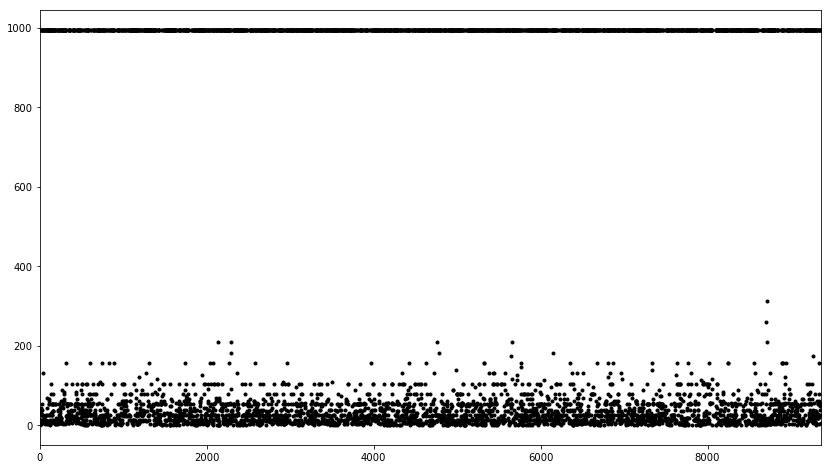

In [9]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))

In [13]:
#drop women still breastfeeding
myfile = myfile[myfile.BFEEDWKS != 994]
myfile = myfile[myfile.BFEEDWKS.notnull()]
#if never breastfed, set number of weeks equal to 0
myfile.loc[myfile['BFEEDWKS'] == 995, 'BFEEDWKS'] = 0
#drop if no babies born
myfile = myfile.dropna(subset=['NBRNLV_S'])
#drop if baby died or given away for adoption
myfile = myfile[myfile.BPA_BDSCHECK1 == 0]

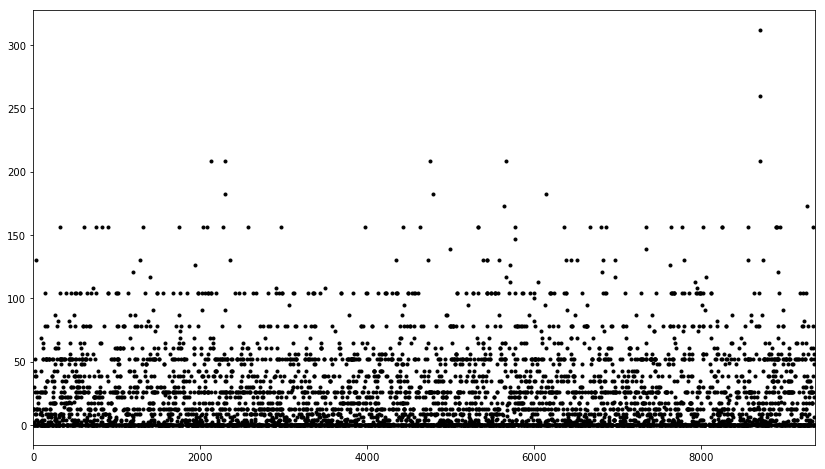

In [14]:
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))

In [20]:
df = pd.DataFrame(myfile, columns=['CASEID', 'PREGORDR', 'PREGEND1', 'WKSGEST', 'BPA_BDSCHECK1', 'BABYSEX1', 'CMBABDOB',  'HPAGELB', 'PRIORSMK', 'NPOSTSMK', 'GETPRENA', 'CMKIDIED', 'CMKIDIED2', 'CMKIDIED3', 'OUTCOM_S', 'NBRNLV_S', 'COHPBEG', 'COHPEND', 'BIRTHORD', 'AGEPREG', 'DATECON', 'AGECON', 'FMAROUT5', 'PMARPREG', 'RMAROUT6', 'FMARCON5', 'RMARCON6', 'PAYDELIV', 'LBW1', 'BFEEDWKS', 'EDUCAT', 'HIEDUC', 'RACE', 'HISPANIC', 'HISPRACE', 'HISPRACE2', 'RCURPREG', 'PREGNUM', 'PARITY', 'CURR_INS', 'PUBASSIS', 'POVERTY', 'LABORFOR', 'RELIGION', 'METRO', 'BRNOUT', 'YRSTRUS'])
for feature in df.keys():
    if feature != 'CASEID':
        print df[feature].value_counts(dropna=False)
        print df[feature].describe()

1     1940
2     1542
3      960
4      498
5      234
6      103
7       51
8       24
9       11
10       6
11       4
12       2
20       1
Name: PREGORDR, dtype: int64
count    5376.000000
mean        2.321429
std         1.494210
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: PREGORDR, dtype: float64
6.0    3839
5.0    1531
1.0       4
4.0       1
2.0       1
Name: PREGEND1, dtype: int64
count    5376.000000
mean        5.710379
std         0.472512
min         1.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: PREGEND1, dtype: float64
39.0    1958
40.0    1112
38.0     648
37.0     363
41.0     349
36.0     248
42.0     182
35.0     182
32.0      79
34.0      55
43.0      47
30.0      43
28.0      22
33.0      21
26.0      14
29.0      13
27.0      12
31.0       7
24.0       6
44.0       6
25.0       3
45.0       2
46.0       2
23.0       1
48.0       1
Name: WKSGEST, d